# Tipos de bases de datos.

Existen dos tipos de bases de datos, Las **bases de datos relacionales** derivados de *SQL* y las **bases de datos NO relacionales** tambien conocidas como las *NO-SQL*, siendo este grupo cualquier tipo de fichero, como lo puede ser los archivos **.CSV, .JSON,** etc.

## Las tipo SQL
Son bases de datos SQL porque usar el lenguaje de consultas SQL. Son bases de datos estructuradas, porque la información se guarda en tablas, las ventajas de este tipo de tablas es que la consulta es mas veloz, pero el guardado de datos es mas lento.
- MySQL
- MariaDB
- Postgres
- SQLite

## Las tipo No-SQL
las que no usan el lenguaje SQL, aquí el formato puede ser de cualquier tipo, desde archivos .txt, pasando por archivos de configuracion, hasta los archivos .Json, tiene la ventaja de que son veloces para guardar la informacion, pero son lentas para consultar.
- JSON
- BSON
- Etc

<img src='SQL_VS_NoSQL.gif'>

# Resumen SQL del Chanchito Feliz

MySQL es un software **RDBMS Relational Database Management System**, que se encarga de
gestionar consultas, garantizar la integridad de los datos y seguridad, algunos ofrecen el servicio de respaldo de datos.

### Tipos de datos:
- **INT:** enteros, tambien conocido como **INTEGER** en otros motores.
- **FLOAT:** Decimales.
- **VARCHAR:** Cadena de caracteres, tambien conocido como **TEXT** en otros motores.

<img src='SQL_SpreadSheet.jpeg'>

1. Lo primero es crear una base de datos `CREATE database holamundo;`
1.1. ver todas las bases de datos creada: `show databases;`
1.2. Hay que indicarle al gestor cual base de datos usar: `use holamundo;`

1. Segundo crear una tabla: 
 
```sql
CREATE TABLE animales(
		id INT,
		tipo VARCHAR(255 caracteres de largo),
		estado VARCHAR(255),
		PRIMARYKEY(id) // Falta NOT NULL AUTO_INCREMENT
		);
```
3. Insertar datos: 
``` sql 
-- insertar datos
INSERT INTO animales(tipo, estado)VALUES('Chanchito','Feliz');
```

4. Modificar una tabla existente: 
```sql
-- Modificar una tabra existente
ALTER TABLE animales MODIFY COLUMN id INT auto_increment; -- MODIFY en otros motores es SET
```
5. Muestra una copia del comando como se ha creado una tabla: 
```sql
-- Mostrar el esquema de creacion de una tabla
SHOW CREATE TABLE animales;
```
6. Comentarios -- use el doble guion
7. Consultar: 
```sql
SELECT * FROM animales; -- Selecciona todo
SELECT * FROM animales WHERE id = 1; -- Selecciona lo que el ID es igual a 1
SELECT * FROM animales WHERE estado = 'Feliz'; -- Selecciona todo lo que la columna coincida con la palabra 'Feliz'
SELECT * FROM animales WHERE estado = 'Feliz' AND tipo = 'Chanchito'; -- Selecciona usando multiple condicion
```
8.  Actualizar registros: 
```SQL 
UPDATE animales SET estado = 'feliz' WHERE id = 3; -- actualizado correctamente
UPDATE animales set estado = 'triste' WHERE tipo = 'dragon'; -- Esto da error 1175
```
9.  Borrar registros: 
```SQL
DELETE FROM anmiales WHERE estado = 'Feliz'; -- No hagas esto
DELETE FROM animales WHERE id = 3; -- Manera correcta
```



------------

De las Acciones CRUD (Create - Read - Update - Delete) la mas importante y que debemos dominar es READ

```sql
SELECT FROM user; -- entrega todas
SELECT FROM user limit 1 -- entrega una consulta
SELECT FROM user WHERE edad > 15 -- edad mayor a 15
SELECT FROM user WHERE edad >= 15 -- edad mayor o igual a 15
SELECT FROM user WHERE edad > 20 AND email = 'nico@gmail.com'; -- mayor a 20 y correo
SELECT FROM user WHERE edad > 20 OR email = 'nico@gmail.com'; -- mayor a 20 o correo
SELECT FROM user WHERE email != 'leyla@gmail.com'; -- email diferente de
SELECT FROM user WHERE edad between 15 and 30; -- edad entre 15 y 20
SELECT FROM user WHERE emali like '%gmail.%'; -- similar a *.txt* que contenga gmail en el nombre
SELECT FROM user WHERE email like '%gmail'; -- El comodin % sirve para seleccionar cualquiera antes o despues del comodin
SELECT FROM user WHERE email like 'oscar%'; -- busca lo que contenga oscar en email
SELECT FROM user order by edad asc; -- busca por edad en orden ascendente
SELECT FROM user order by edad desc; -- busca por edad en orden descendente
SELECT max(edad) AS mayor FROM user; -- busca el ususario mas viejo
SELECT min(edad) AS menor FROM user; -- busca el usuario mas joven
SELECT id, name FROM user; -- muestra las columnas id y name
SELECT id, name AS nombre form user; -- renombra con alias las columnas.
```


--------
1. Creación de una nueva tabla.

```sql
CREATE TABLE products(
	id INT not null auto_increment,
	name VARCHAR(50) not null,
	created_by INT not null,
	marca VARCHAR(50) not null,
	primarykey(id),
	foreign key(created_by) references user(id) -- obtiene llave desde user id
	);
```

2. Renombrar una tabla
```SQL
RENAME TABLE products to product; -- renombra la tabla productos a producto
```
3. Insertar múltiples filas a una tabla:
```SQL
INSERT INTO product(name, created_by, marca)
VALUES('ipad',1,'apple'),
	('iphone',2,'apple'),
	('macbook',1,'apple'),
	('watch',2,'apple'),
	('imac',3,'apple'),
	('ipod mini',2,'apple');
```
### Joins

Supongamos que queremos juntar dos tablas para crear una nueva

- Existe Left JOIN que toma la tabla de la izquierda como principal y añade datos de la derecha si tiene registros asociados

``` SQL
SELECT u.id, u.email, p.name FROM user u LEFT JOIN product p ON u.id = p.created_by;
```

- Right JOIN es similar a LEFT JOIN, pero toma como principal la tabla de la derecha
```SQL
SELECT u.id, u.email, p.name FROM user u RIGHT JOIN product p ON u.id = p.created_by;
```
- Inner JOIN solo toma los datos de la interseccion entre Right y Left que tengan coneccion
```SQL
SELECT u.id, u.email, p.name FROM user u INNER JOIN product p ON u.id = p.created_by;
```
- Cross JOIN, muestra los datos como si fuera una multiplicacion cruz de vectores
```SQL
SELECT u.id, u.name, p.id, p.name FROM user cross JOIN product p;
```
### groups

Crea grupos pivotando al rededor de una columna, 
```SQL
-- El resultado de esto es muy similar a pandas en python
SELECT count(id), marca FROM product GROUP BY marca; -- agrupa por marcas ´apple = 6´
SELECT count(p.id), u.name FROM product p LEFT JOIN user u ON u.id = p.created_by GROUP BY p.crated_by;
SELECT count(p.id), u.name FROM product p LEFT JOIN user u ON u.id = p.created_by GROUP BY p.crated_by having count(p.id) >= 2;
```
### drop TABLE
Elimina tablas
```SQL
drop TABLE product; -- elimina la tabla de producto
```

# Operadores, Funciones interas y palabras clave

|Operador|Condición|Ejemplo SQL|
|--------|---------|-----------|
|=,!=,<,<=,>,>= |operaciones numericas estandar | col_name != 4|
|BETWEEN... AND| Numeros Entre x Y x2 | col_name BETWEEN 1.5 AND 10.5|
|NOT BETWEEN... AND| Numero fuera de rango| col_name NOT BETWEEN 1 AND 10|
|IN(...) | Numeros existen en una lista | col_name IN (2,4,6)|
|NOT IN(...)|Numeros no existen en una lista | col_name NOT IN(1,3,5)|
| = | Comparación sensitiva de strings exacta | col_name = 'abc'|
| != ó <> | Comparacion sensitiva exacta comparacion desigual | col_name != "abcd"|
|LIKE| Comparación no sensitiva | col_name LIKE "ABC"|
|NOT LIKE | Comparación no sensitiva desigual | col_name NOT LIKE "ABCD"|
| % | Usado en cualquier strin para que encaje en una secuencia de cero o mas caracteres (solo con LIKE y NOT LIKE) | col_name  LIKE %AT% -- AT AT~~TIC~~ ~~C~~AT ~~B~~AT~~S~~|
|IN(...)|String existe en una lista | col_name IN('A','B','B')|
|NOT IN(...)|String no existe en una lista | col_name NOT IN('D','E','F')|


Funciones comunes en SQL

|Funcion| Descripción|
|-------|------------|
|COUNT(*)| Funcion comun que hace conteo de filas en un grupo si no hay nombre de columna especificado|
|COUNT(column)| de lo contraio cuenta el numero de filas en un grupo de valores no NULL |
|MIN(column)| Encuentra el numero as pequeño en una columna especifica|
|MAX(column)| Encuentra el numero mas grande |
|AVG(column)| Encuentra el promedio en una columna|
|SUM(column)| Hace sumatoria de los valores de una columna|


Restricciones.

| Restricción | Descripción |
|-------------|-------------|
|PRIMARY KEY | Esto significa que los valores de esta columna son unicos y cada valor identifica una sola fila en la tabla |
|AUTOINCREMENT| En el caso de los valores enteros, completa automaticamente el valor de una fila incrementando una unidad |
|UNIQUE | Esto restringe a que los valores de una columna sean unicos  |
|NOT NULL   | Restringe a que la columna tenga todos los valores rellenos|
|CHECK(expresion)| Permite ejecutar una expresion mas compleja para comprobar i los valores insertados son validos. ej: puede comprobar que los valores sean positivos, mayores a un valor especifico, que comiencen con un prefijo etc. |
|FOREIGN KEY| Comprovacion de coherencia que garantiza que cada valor columna se corresponde con otro valor de una tabla de una columna de otra tabla |

Tipos de datos

|Tipos de datos | Descripción |
|---------------|-------------|
| INTEGER BOOLEAN | Tipos de datos enteros. Los booleanos repreenta 0 y 1 |
| FLOAT, DOUBLE, REAL | Tipos de datos flotantes, el tipo de dato corresponde al tamaño en memoria |
| CHARACTER(num chars), VARCHAR(num chars), TEXT | Tipos de datos de strings |
| DATE, DATETIME | Tipo de datos para fechas y tiempo |
| BLOB | Almacena datos binarios en blobs directamente, esto puede ser opaco |

Palabras clave

|Palabra clave | descripción|
|--------------|------------|
|FROM y JOINs   |La FROM cláusula y las subsiguientes JOIN se ejecutan primero paradeterminar el conjunto de datos de trabajo total que se estáconsultando. Esto incluye subconsultas en esta cláusula y puedeprovocar que se creen tablas temporales en segundo plano quecontengan todas las columnas y filas de las tablas que se están uniendo.|
|WHERE|Una vez que tenemos el conjunto de datos de trabajo total, lasWHERE restricciones de primer paso se aplican a las filas individualesy las filas que no satisfacen la restricción se descartan. Cada una delas restricciones solo puede acceder a las columnas directamentedesde las tablas solicitadas en la FROM cláusula. Los alias en laSELECT parte de la consulta no son accesibles en la mayoría de lasbases de datos, ya que pueden incluir expresiones que dependende partes de la consulta que aún no se han ejecutado.|
|GROUP BY|Las filas restantes después de WHERE aplicar las restricciones seagrupan en función de los valores comunes en la columna especificadaen la GROUP BY cláusula. Como resultado de la agrupación, solo habrátantas filas como valores únicos haya en esa columna. Implícitamente,esto significa que solo debería necesitar usar esto cuando tengafunciones agregadas en su consulta.|
|HAVING|Si la consulta tiene una GROUP BY cláusula, las restricciones de laHAVING cláusula se aplican a las filas agrupadas y se descartan las filasagrupadas que no satisfacen la restricción. Al igual que la WHEREcláusula, los alias tampoco son accesibles desde este paso en la mayoríade las bases de datos.|
|SELECT|Cualquier expresión en la SELECT parte de la consulta se calculafinalmente.|
|DISTINCT|De las filas restantes, DISTINCT se descartarán las filas con valoresduplicados en la columna marcada como.|
|ORDER BY|Si la cláusula especifica un orden ORDER BY, las filas se ordenansegún los datos especificados en orden ascendente o descendente.Dado que se SELECT han calculado todas las expresiones de la partede la consulta, puede hacer referencia a alias en esta cláusula.|
|LIMIT/OFFSET|Finalmente, las filas que quedan fuera del rango especificado por LIMITy OFFSET se descartan, dejando el conjunto final de filas que se devolverán de la consulta.|

### Conclusión

No todas las consultas necesitan tener todas las partes queenumeramos anteriormente, pero una de las razones por las que SQLes tan flexible es que permite a los desarrolladores y analistas dedatos manipular datos rápidamente sin tener que escribir código

### Otros tipos de datos

| Funcion | Descripción |
|---------|-------------|
| extract(day from current_date) | extrae el dia de la fecha actual en numérico |
| current_time  | Obtiene hora actual |
| now() | Obtiene la fecha y hora actual |
| random() | Genera un numero aleatorio |
| translate('lopez', 'ié', 'ie') | Reemplaza letras dentro de una palabra |
| replace('night','n','l') | Reemplaza un caracter o varios |
| rtrim('postgresql','sql') | Remueve los caracteres a la derecha |
| ltrim('postgresql','postgre') | Remueve los caracteres a la izquierda |
| trim(trailing '*' from 'flor   ') | quita los caracteres en ambos sentidos, en este caso espacios |
| substr('salsa',1,3) | toma las letras de las posiciones desde 1 a 3 en este ejemplo |
| position('al' in 'salsa') | Entrega la posicion dentro de la coincidencia |
| concat('hola',' ','mundo') | conatena strings es igual a `'hola'\|\|' '\|\| mundo` |
| reverse('SQL Tutorial') | Invierte el orden de los caracteres |
| upper('hola') | convierte a mayuscula cadenas de texto |
| lower('HOLA') | convierte a minuscula |
| bpcharcmp('oracion','oración') | compara cadenas de texto si son iguales |
| ascii('@') | devuelve el numero entero correspondiente al código ascii |
| char(64) | devuelve el caracter correspondiente al código ascii |
| split.part('2021-03-05', '-',1) | separa cadenas mediante un simbolo o caracter, creando una lista y tomando el dato en la pocision dentro de la lista |
| round(46.6) | redondea un flotante a numero entero |
| floor(45.6) | redondea un flotante hacia el piso |
| ceil(45.6) | redondea un flotante hacia el techo |


<?xml version="1.0" encoding="UTF-8" standalone="no"?>
<svg
   xmlns:dc="http://purl.org/dc/elements/1.1/"
   xmlns:cc="http://creativecommons.org/ns#"
   xmlns:rdf="http://www.w3.org/1999/02/22-rdf-syntax-ns#"
   xmlns:svg="http://www.w3.org/2000/svg"
   xmlns="http://www.w3.org/2000/svg"
   xmlns:xlink="http://www.w3.org/1999/xlink"
   xmlns:sodipodi="http://sodipodi.sourceforge.net/DTD/sodipodi-0.dtd"
   xmlns:inkscape="http://www.inkscape.org/namespaces/inkscape"
   version="1.1"
   id="svg389"
   width="713.42365"
   height="453.93588">
  <metadata
     id="metadata395">
    <rdf:RDF>
      <cc:Work
         rdf:about="">
        <dc:format>image/svg+xml</dc:format>
        <dc:type
           rdf:resource="http://purl.org/dc/dcmitype/StillImage" />
      </cc:Work>
    </rdf:RDF>
  </metadata>
  <defs
     id="defs393" />
  <sodipodi:namedview
     pagecolor="#ffffff"
     bordercolor="#666666"
     borderopacity="1"
     objecttolerance="10"
     gridtolerance="10"
     guidetolerance="10"
     inkscape:pageopacity="0"
     inkscape:pageshadow="2"
     inkscape:window-width="640"
     inkscape:window-height="480"
     id="namedview391" />
  <inkscape:clipboard
     style="font-variation-settings:normal;opacity:1;vector-effect:none;fill:#000000;fill-opacity:1;stroke-width:3.77952756;stroke-linecap:butt;stroke-linejoin:miter;stroke-miterlimit:4;stroke-dasharray:none;stroke-dashoffset:0;stroke-opacity:1;stop-color:#000000;stop-opacity:1"
     min="3754.6875,2594.3423"
     max="4468.1112,3048.2782" />
  <g
     id="g397"
     transform="matrix(3.7795276,0,0,3.7795276,-3754.6875,-2594.3423)">
    <image
       y="686.41974"
       x="993.42773"
       xlink:href="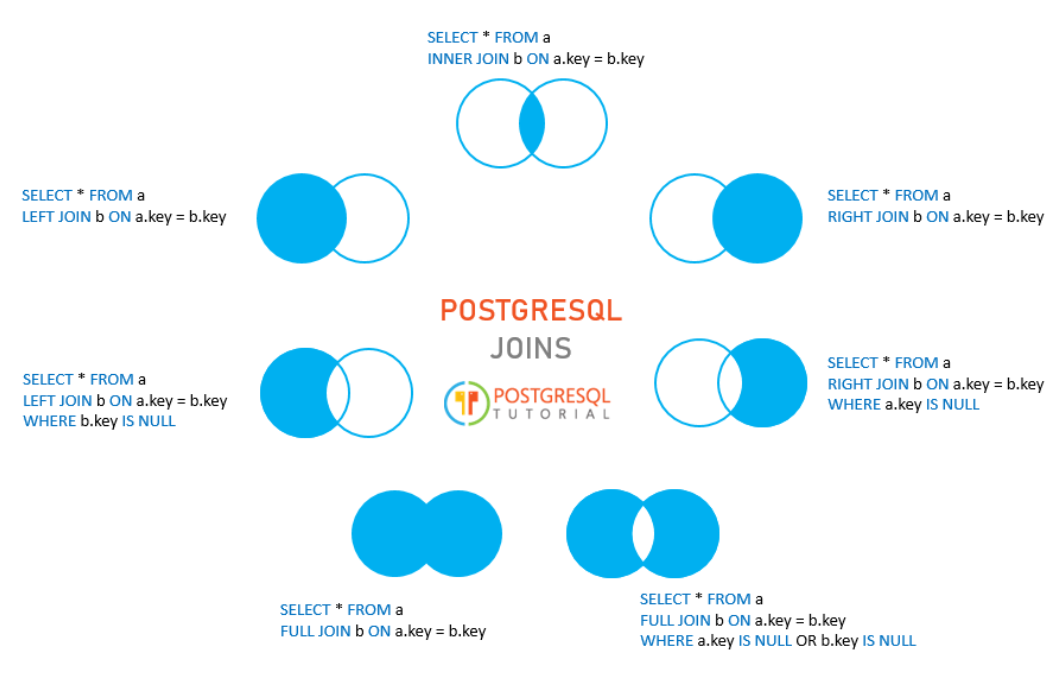"
       height="120.10387"
       width="188.76001"
       preserveAspectRatio="none"
       id="image1-30" />
  </g>
</svg>



--------------------------

# SQLite desde la terminal

**SQLite viene integrado en todos los sistemas operativos**, normalmente viene como un tipo de **libreria** que se puede usar para **multiples lenguajes ** o como una dependencia para diversos programas, pero inicialmente no existe un programa nativo que gestione las bases de datos.

lo primero es saber si tenemos instalado sqlite3, hay varias formas
1. ejecutar el comando directamente: `sqlite3 --version` si puedes leer la version entonces está bien
2. buscar en la lista de paquetes si lo tienes instalado: `dpkg -l` y busca el renglon que diga sqlite ver: 3.x.x.x.

Si definitivamente no está instalado, abre la terminal y sigue los pasos:
1. actualiza el sistema: `sudo apt-get update`
2. instala: `sudo apt-get install sqlite3`

Si necesitas ayuda con sqlite3 puedes consultar:
1. manual de terminal: `man sqlite3`
2. manual sqlite3 terminal: `>sqlite .help`
3. pagina web: [http://sqlite.org/cli.htm](sqlite)



#### Creando un ejemplo
Si ejecuta el comando `sqlite3` sin ningun nombre frente al comando, el motor creará una base de datos temporal automaticamente que solo vivirá mientras viva en ejecucion el programa, al cerrar el programa toda la informacion se perderá

Si ejecuta el comando `sqlite3 nombre_archivo` entonces creará un archivo nuevo si el nombre del archivo no existe en el directorio, sino abrirá el archivo existente, similar como cuando creas un archivo en el editor nano

para este ejemplo ejecutaremos: `sqlite3 ex1` esto creara el archivo ex1

```SQL
CREATE TABLE tbl1(one text, two INT);
INSERT INTO tbl1('hello',10);
INSERT INTO tbl1('goodbye',20);
SELECT * FROM tbl1;
```
debe mostrar algo como:
```
hello|10
goodbye|20
```
Para guardar la tabla use la funcion `.exit` o para salir forzosamente presione ~~CTRL+D~~ o presione ~~CTRL+C~~ para interrumpir



##### Agreguemos una segunda tabla. 
Supongamos que hemos salido del programa. abre la terminal y escribe:
`sqlite3 ex1`
ahora agreguemos la tabla 2:
```SQL
CREATE TABLE tbl2(
    f1 VARCHAR(30) primary key,
    f2 text,
    f3 real
);
```
Hay varias cosas que notar:
1. Si no pones un --;-- entonces el programa esperará un input por parte del usuario, veras algo similar a esto ...>
2. El lenguaje SQL **NO distingue minusculas de mayusculas**, pero por convencion escribe en **mayusculas los comandos** y en *minusculas los datos.*



## Comandos de punto.

Existen algunos comando de punto o **dot-commands** que le sirven al interprete para realizar acciones.
**__Estos nada tienen que ver con el lenguaje SQL__**, solo son una herramienta para realizar operaciones con la base de datos como:
abrir, cerrar, salir, listar las bases de datos, crear respaldos, manejar rutas etc.
para saber los mas de 60 comandos escribe `.help`

### .mode
un dot-command interesante es `.mode` que te muestra los resultados en distintos formatos:
ascii	html	list	tabs
box	INSERT	markd	tcl
csv	json	quote	
column	line	TABLE

- Si escribes `.mode` solo te mostrará el modo actual
- Si quieres cambiar el modo escribe: `.mode list` en este caso el modo elegido es el modo por defecto que es lista.

Dominar este comando puede ser muy util para copiar ejemplos e insertarlos dentro de otros lenguajes de programacion.

### .separator
puedes elegir el caracter separador `.separator ", "` en este caso ha sido la coma y el espacio

### .tables
tables sirve para consultar la lista de tablas creadas dentro de una base de datos.
`.tables` es un atajo de:
```SQL
SELECT name FROM sqlite_schemma WHERE type IN('TABLE','view') AND name NOT LIKE 'sqlite_%' ORDER BY 1;
```
### .schema
Hace una lista de los esquemas de las tablas, esto es muy util si quieres copiar el formato de las tablas para otros tipos de bases de datos como mySQL, etc.

